## 인공지능 개론 6주차

### 복습
1. 훈련 데이터와 테스트 데이터를 나누는 이유
2. 데이터 벨런스 : 밸런스가 안맞는 데이터로 훈련하면, 편향성이 생길 수 있다. (남자가 많은 반)
3. knn 알고리즘 중요
4. 혼동행렬 : 민감도가 반영을 잘 못하는 경우 = 데이터 벨런스가 안맞을 때 (FN 이슈)
5. 선형회귀 : 
6. 원 핫 인코딩 : 데이터 간의 종속성을 없애주기 위해 사용한다.
7. ReLu 활성화 함수 : 미분손실을 줄이기 위해 사용 
8. tanh 활성화 함수 : 안정화를 위해 사용
9. 옵티마이저 : 오차값을 최소화하는 가중치를 찾는 알고리즘 (ex: 경사 하강법)

### 실습 126p - 머신러닝

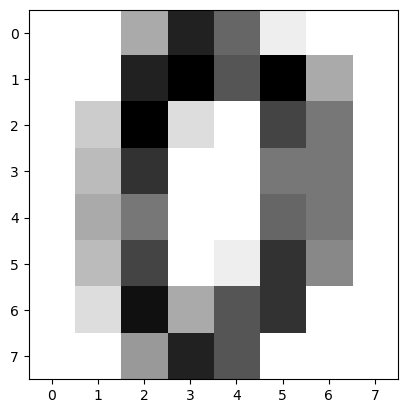

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0],cmap=plt.cm.gray_r, interpolation='nearest')

#### 평탄화 작업

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples,-1))

#### x,y,훈련,test 데이터 분할

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.2)

#### 머신러닝 모델

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [9]:
# Build a logistic regression classifier and predict

mnst_lr = LogisticRegression(random_state=0)
mnst_lr.fit(X_train, y_train)

pred_lr = mnst_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9694444444444444
[[40  0  0  0  0  1  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  1  0]
 [ 0  1  0  0 39  0  0  0  1  0]
 [ 0  0  0  0  0 39  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  0  0  1  0  0  0 21  1]
 [ 0  0  0  0  1  1  1  0  1 36]]


/Users/yunseongmun/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
mnst_nn = MLPClassifier(random_state=0)
mnst_nn.fit(X_train, y_train)

pred_nn = mnst_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.9777777777777777
[[41  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  1  0]
 [ 0  1  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  1  0  0  0 39  0  0]
 [ 0  1  0  0  1  0  0  0 22  0]
 [ 0  0  0  0  0  1  0  0  2 37]]


In [11]:
# Build a decision tree classifier and predict

mnst_dt = DecisionTreeClassifier(random_state=0)
mnst_dt.fit(X_train, y_train)

pred_dt = mnst_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8444444444444444
[[41  0  0  0  0  0  0  0  0  0]
 [ 0 24  3  1  4  0  0  0  1  0]
 [ 1  1 33  2  0  0  1  0  1  0]
 [ 0  1  2 21  2  1  0  0  1  1]
 [ 0  0  0  0 38  1  0  1  1  0]
 [ 0  0  0  2  0 34  0  0  2  1]
 [ 0  1  0  1  2  0 30  0  0  0]
 [ 0  0  2  3  2  0  0 33  0  0]
 [ 0  1  0  2  0  0  1  0 20  0]
 [ 2  2  0  2  2  1  0  0  1 30]]


In [12]:
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.975
[[41  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  1  0  0]
 [ 0  0  0  0 40  0  0  0  0  1]
 [ 0  0  0  0  0 38  0  0  1  0]
 [ 0  1  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  1  1  0  1  0  0  0 21  0]
 [ 0  0  0  0  0  1  0  0  1 38]]
